# Regression Case Study - Car Prices
Let's setup a complete case study using the "Car Price" dataset. We'll use the following regression methods: Simple Linear Regression, Polynomial Linear Regression, Polynomial Linear Regression with Regularization (Ridge, Lasso, Elastic Net), Multivariable Regression, Cross Validation with different folds (3, 5, 10), and Ensemble Methods (Bagging, Boosting, Stacking). At the end, we'll visualize the results of these models for comparison.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

## Exploratory Analysis

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
print(df.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [7]:
print(df.describe(include='all'))

            car_ID   symboling        CarName fueltype aspiration doornumber  \
count   205.000000  205.000000            205      205        205        205   
unique         NaN         NaN            147        2          2          2   
top            NaN         NaN  toyota corona      gas        std       four   
freq           NaN         NaN              6      185        168        115   
mean    103.000000    0.834146            NaN      NaN        NaN        NaN   
std      59.322565    1.245307            NaN      NaN        NaN        NaN   
min       1.000000   -2.000000            NaN      NaN        NaN        NaN   
25%      52.000000    0.000000            NaN      NaN        NaN        NaN   
50%     103.000000    1.000000            NaN      NaN        NaN        NaN   
75%     154.000000    2.000000            NaN      NaN        NaN        NaN   
max     205.000000    3.000000            NaN      NaN        NaN        NaN   

       carbody drivewheel enginelocatio

### Visualiza your result

## Prepare the Dataset

### Prepare independent variables

In [8]:
X_raw = df.iloc[:, 1:-1]

### Encode independent categorical variables

In [9]:
X_categorical_columns_names = [
  'CarName',
  'fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'enginetype',
  'cylindernumber',
  'fuelsystem'
]

"""

#
# Encoding all categorical variables will yeld a very big dataframe which will
# overflow available RAM for the standard notebook session.
#

X_raw_categorical = np.array(X_raw[X_categorical_columns_names]).reshape(-1,10)

X_categorical_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_categorical_encoded_array = X_categorical_encoder.fit_transform(X_raw_categorical)

X_categorical_encoded = pd.DataFrame(
    X_categorical_encoded_array,
    columns=X_categorical_encoder.get_feature_names_out(X_categorical_columns_names)
)

X_non_categorical = X_raw.drop(columns=X_categorical_columns_names)

X = pd.concat([X_categorical_encoded, X_non_categorical], axis=1)

X.head()
"""

#
# Instead of encoding all categorical variables we will simply drop them
#
X = X_raw.drop(columns=X_categorical_columns_names)
X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


### Prepare dependent variable

In [10]:
y = df["price"]

### Encode dependent categorical variable

In [11]:
# NOT NEEDED

### Split the data into training and testing sets


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Simple Linear Regression

In [13]:
# Create and fit the simple linear regression model
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_slr = simple_linear_model.predict(X_train)
y_test_pred_slr = simple_linear_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
slr_r2_train = r2_score(y_train, y_train_pred_slr)
slr_r2_test = r2_score(y_test, y_test_pred_slr)
slr_mse_train = mean_squared_error(y_train, y_train_pred_slr)
slr_mse_test = mean_squared_error(y_test, y_test_pred_slr)

print(f"Simple Linear Regression:")
print(f"Training R-squared: {slr_r2_train:.4f}, Training MSE: {slr_mse_train:.4f}")
print(f"Testing R-squared: {slr_r2_test:.4f}, Testing MSE: {slr_mse_test:.4f}")

Simple Linear Regression:
Training R-squared: 0.8579, Training MSE: 8477376.4681
Testing R-squared: 0.8181, Testing MSE: 14358029.1169


## Polynomial Linear Regression

In [14]:
# Polynomial degrees
degrees = [2, 3, 4]

# Create and fit the polynomial regression models with different degrees
polynomial_models = []
polynomial_r2_train_scores = []
polynomial_r2_test_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    polynomial_models.append(model)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    polynomial_r2_train = r2_score(y_train, y_train_pred)
    polynomial_r2_test = r2_score(y_test, y_test_pred)

    polynomial_r2_train_scores.append(polynomial_r2_train)
    polynomial_r2_test_scores.append(polynomial_r2_test)

# Find the best degree based on the testing R-squared score
best_degree = degrees[np.argmax(polynomial_r2_test_scores)]

print(f"\nPolynomial Linear Regression:")
print(f"Best Degree: {best_degree}")
print(f"Training R-squared Scores: {polynomial_r2_train_scores}")
print(f"Testing R-squared Scores: {polynomial_r2_test_scores}")


Polynomial Linear Regression:
Best Degree: 2
Training R-squared Scores: [0.9915934653662325, 0.9982983534092452, 0.9982987255342008]
Testing R-squared Scores: [-0.923666150053702, -26852.471111505605, -3150.845952802622]


## Polynomial Linear Regression with Regularization

In [15]:
# Continue with degree of 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Regularization strengths (alpha values)
alphas = [0.001, 0.01, 0.1, 1, 10]

# Create and fit the Ridge, Lasso, and ElasticNet regression models with different alpha values
ridge_models = []
ridge_r2_train_scores = []
ridge_r2_test_scores = []

lasso_models = []
lasso_r2_train_scores = []
lasso_r2_test_scores = []

elasticnet_models = []
elasticnet_r2_train_scores = []
elasticnet_r2_test_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)
    ridge_models.append(ridge_model)

    # Make predictions on training and testing data
    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    ridge_r2_train = r2_score(y_train, y_train_pred)
    ridge_r2_test = r2_score(y_test, y_test_pred)

    ridge_r2_train_scores.append(ridge_r2_train)
    ridge_r2_test_scores.append(ridge_r2_test)

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly, y_train)
    lasso_models.append(lasso_model)

    # Make predictions on training and testing data
    y_train_pred = lasso_model.predict(X_train_poly)
    y_test_pred = lasso_model.predict(X_test_poly)

    # Calculate R-squared for evaluation
    lasso_r2_train = r2_score(y_train, y_train_pred)
    lasso_r2_test = r2_score(y_test, y_test_pred)

    lasso_r2_train_scores.append(lasso_r2_train)
    lasso_r2_test_scores.append(lasso_r2_test)

    for l1_ratio in [0.2, 0.5, 0.8]:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elasticnet_model.fit(X_train_poly, y_train)
        elasticnet_models.append(elasticnet_model)

        # Make predictions on training and testing data
        y_train_pred = elasticnet_model.predict(X_train_poly)
        y_test_pred = elasticnet_model.predict(X_test_poly)

        # Calculate R-squared for evaluation
        elasticnet_r2_train = r2_score(y_train, y_train_pred)
        elasticnet_r2_test = r2_score(y_test, y_test_pred)

        elasticnet_r2_train_scores.append(elasticnet_r2_train)
        elasticnet_r2_test_scores.append(elasticnet_r2_test)

print(elasticnet_r2_test_scores)
print(np.argmax(elasticnet_r2_test_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.511e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.572e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objectiv

[0.3795449061512267, 0.38003688437597716, 0.3813409041517355, 0.3708341270470987, 0.3745002569574879, 0.37820549851667984, 0.34121757499529526, 0.34649291616735833, 0.3596519155860932, 0.3350928852959899, 0.33662594652804634, 0.3368856834795765, 0.32532874001724654, 0.32706945293344747, 0.33230097396323566]
2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.947e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


In [16]:
# Find the best alpha values for Ridge, Lasso, and ElasticNet based on the testing R-squared scores
best_alpha_ridge = alphas[np.argmax(ridge_r2_test_scores)]
best_alpha_lasso = alphas[np.argmax(lasso_r2_test_scores)]
best_alpha_elasticnet = alphas[np.argmax(elasticnet_r2_test_scores)]
best_l1_ratio_elasticnet = [0.2, 0.5, 0.8][np.argmax(elasticnet_r2_test_scores) // len(alphas)]

print(f"\nPolynomial Linear Regression with Regularization:")
print(f"Best Alpha (Ridge): {best_alpha_ridge:.4f}")
print(f"Best Alpha (Lasso): {best_alpha_lasso:.4f}")
print(f"Best Alpha (ElasticNet): {best_alpha_elasticnet:.4f}")
print(f"Best l1_ratio (ElasticNet): {best_l1_ratio_elasticnet:.1f}")
print(f"Ridge Training R-squared Scores: {ridge_r2_train_scores}")
print(f"Ridge Testing R-squared Scores: {ridge_r2_test_scores}")
print(f"Lasso Training R-squared Scores: {lasso_r2_train_scores}")
print(f"Lasso Testing R-squared Scores: {lasso_r2_test_scores}")
print(f"ElasticNet Training R-squared Scores: {elasticnet_r2_train_scores}")
print(f"ElasticNet Testing R-squared Scores: {elasticnet_r2_test_scores}")


Polynomial Linear Regression with Regularization:
Best Alpha (Ridge): 0.0010
Best Alpha (Lasso): 0.0010
Best Alpha (ElasticNet): 0.1000
Best l1_ratio (ElasticNet): 0.2
Ridge Training R-squared Scores: [0.7718926356721464, 0.7718926356721464, 0.7718926356721464, 0.7718926356721464, 0.7718926356721464]
Ridge Testing R-squared Scores: [-5.796148826623652, -5.796148826623652, -5.796148826623652, -5.796148826623652, -5.796148826623652]
Lasso Training R-squared Scores: [0.9887318251604063, 0.9887312689865088, 0.9887256084637667, 0.9886594022811637, 0.9884825869888427]
Lasso Testing R-squared Scores: [0.38453631419002177, 0.3845067523943354, 0.38420857146141607, 0.3799465739053203, 0.35899163591910854]
ElasticNet Training R-squared Scores: [0.9886778533650702, 0.988681206048578, 0.9886897767603158, 0.9886189106941481, 0.9886431366644984, 0.9886678782689207, 0.9884303666401411, 0.9884602610408442, 0.9885430024855868, 0.9884141044667727, 0.9884345105853818, 0.9884239120674931, 0.98818056380117

## Multivariable Regression

In [17]:
# Create and fit the multivariable regression model
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_multi = multi_linear_model.predict(X_train)
y_test_pred_multi = multi_linear_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
multi_r2_train = r2_score(y_train, y_train_pred_multi)
multi_r2_test = r2_score(y_test, y_test_pred_multi)
multi_mse_train = mean_squared_error(y_train, y_train_pred_multi)
multi_mse_test = mean_squared_error(y_test, y_test_pred_multi)

print(f"\nMultivariable Regression:")
print(f"Training R-squared: {multi_r2_train:.4f}, Training MSE: {multi_mse_train:.4f}")
print(f"Testing R-squared: {multi_r2_test:.4f}, Testing MSE: {multi_mse_test:.4f}")


Multivariable Regression:
Training R-squared: 0.8579, Training MSE: 8477376.4681
Testing R-squared: 0.8181, Testing MSE: 14358029.1169


## Cross Validation
We will perform cross-validation using 3-folds, 5-folds, and 10-folds to assess the performance of different regression models.

In [18]:
# Define a function to perform cross-validation and calculate mean R-squared scores
def perform_cross_validation(model, X, y, cv):
    cv_scores = cross_val_score(model, X, y, scoring='r2', cv=cv)
    mean_cv_score = np.mean(cv_scores)
    return mean_cv_score

# Cross-validation with 3-folds
cv_3folds_score = perform_cross_validation(multi_linear_model, X, y, cv=3)
print(f"Cross Validation (3-folds) R-squared: {cv_3folds_score:.4f}")

# Cross-validation with 5-folds
cv_5folds_score = perform_cross_validation(multi_linear_model, X, y, cv=5)
print(f"Cross Validation (5-folds) R-squared: {cv_5folds_score:.4f}")

# Cross-validation with 10-folds
cv_10folds_score = perform_cross_validation(multi_linear_model, X, y, cv=10)
print(f"Cross Validation (10-folds) R-squared: {cv_10folds_score:.4f}")

Cross Validation (3-folds) R-squared: 0.6840
Cross Validation (5-folds) R-squared: 0.5832
Cross Validation (10-folds) R-squared: 0.2100


## Ensemble Methods
Now, let's apply Ensemble Methods using Bagging, Boosting, and Stacking techniques.
### Bagging - Random Forest Regression

In [19]:
# Create and fit the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
rf_r2_train = r2_score(y_train, y_train_pred_rf)
rf_r2_test = r2_score(y_test, y_test_pred_rf)
rf_mse_train = mean_squared_error(y_train, y_train_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_test_pred_rf)

print(f"\nRandom Forest Regression (Bagging):")
print(f"Training R-squared: {rf_r2_train:.4f}, Training MSE: {rf_mse_train:.4f}")
print(f"Testing R-squared: {rf_r2_test:.4f}, Testing MSE: {rf_mse_test:.4f}")


Random Forest Regression (Bagging):
Training R-squared: 0.9865, Training MSE: 807833.0663
Testing R-squared: 0.9318, Testing MSE: 5387651.7755


### Boosting - Gradient Boosting Regression

In [20]:
# Create and fit the Gradient Boosting regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
gb_r2_train = r2_score(y_train, y_train_pred_gb)
gb_r2_test = r2_score(y_test, y_test_pred_gb)
gb_mse_train = mean_squared_error(y_train, y_train_pred_gb)
gb_mse_test = mean_squared_error(y_test, y_test_pred_gb)

print(f"\nGradient Boosting Regression (Boosting):")
print(f"Training R-squared: {gb_r2_train:.4f}, Training MSE: {gb_mse_train:.4f}")
print(f"Testing R-squared: {gb_r2_test:.4f}, Testing MSE: {gb_mse_test:.4f}")


Gradient Boosting Regression (Boosting):
Training R-squared: 0.9927, Training MSE: 433549.5758
Testing R-squared: 0.9323, Testing MSE: 5346541.0810


### Stacking - Stacking Regressor

In [21]:
# Create a list of base models for stacking
base_models = [
    ('ridge', Ridge(alpha=best_alpha_ridge)),
    ('lasso', Lasso(alpha=best_alpha_lasso)),
    ('elasticnet', ElasticNet(alpha=best_alpha_elasticnet, l1_ratio=best_l1_ratio_elasticnet))
]

# Create and fit the Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=multi_linear_model)
stacking_model.fit(X_train, y_train)

# Make predictions on training and testing data
y_train_pred_stack = stacking_model.predict(X_train)
y_test_pred_stack = stacking_model.predict(X_test)

# Calculate R-squared and mean squared error for evaluation
stack_r2_train = r2_score(y_train, y_train_pred_stack)
stack_r2_test = r2_score(y_test, y_test_pred_stack)
stack_mse_train = mean_squared_error(y_train, y_train_pred_stack)
stack_mse_test = mean_squared_error(y_test, y_test_pred_stack)

print(f"\nStacking Regressor (Stacking):")
print(f"Training R-squared: {stack_r2_train:.4f}, Training MSE: {stack_mse_train:.4f}")
print(f"Testing R-squared: {stack_r2_test:.4f}, Testing MSE: {stack_mse_test:.4f}")


Stacking Regressor (Stacking):
Training R-squared: 0.8543, Training MSE: 8690182.3344
Testing R-squared: 0.8217, Testing MSE: 14072224.6710


## Visualize the Comparison
Let's visualize the R-squared scores of different regression methods. This bar chart will show the comparison of different regression methods, Cross Validation, and Ensemble Methods based on their training and testing R-squared scores. The higher the R-squared score, the better the model fits the data. The chart will help you understand which regression method performs best for the "Diabetes" dataset.

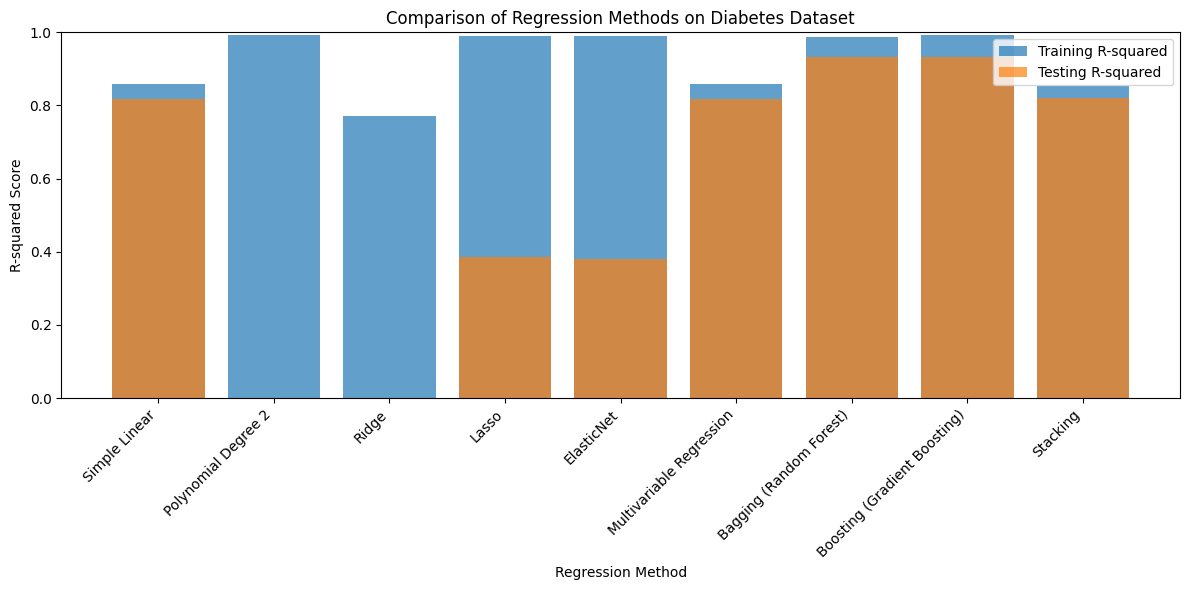

In [22]:
# Create a DataFrame to store the R-squared scores
method_names = ['Simple Linear', f'Polynomial Degree {best_degree}', 'Ridge', 'Lasso', 'ElasticNet',
                'Multivariable Regression', 'Bagging (Random Forest)', 'Boosting (Gradient Boosting)', 'Stacking']
train_r2_scores = [slr_r2_train, polynomial_r2_train_scores[np.argmax(polynomial_r2_test_scores)],
                   ridge_r2_train_scores[np.argmax(ridge_r2_test_scores)], lasso_r2_train_scores[np.argmax(lasso_r2_test_scores)],
                   elasticnet_r2_train_scores[np.argmax(elasticnet_r2_test_scores)], multi_r2_train, rf_r2_train, gb_r2_train, stack_r2_train]

test_r2_scores = [slr_r2_test, polynomial_r2_test_scores[np.argmax(polynomial_r2_test_scores)],
                  ridge_r2_test_scores[np.argmax(ridge_r2_test_scores)], lasso_r2_test_scores[np.argmax(lasso_r2_test_scores)],
                  elasticnet_r2_test_scores[np.argmax(elasticnet_r2_test_scores)], multi_r2_test, rf_r2_test, gb_r2_test, stack_r2_test]

r2_scores_df = pd.DataFrame({'Method': method_names, 'Training R-squared': train_r2_scores, 'Testing R-squared': test_r2_scores})

# Visualize the R-squared scores
plt.figure(figsize=(12, 6))
plt.bar(method_names, train_r2_scores, label='Training R-squared', alpha=0.7)
plt.bar(method_names, test_r2_scores, label='Testing R-squared', alpha=0.7)
plt.xlabel('Regression Method')
plt.ylabel('R-squared Score')
plt.title('Comparison of Regression Methods on Diabetes Dataset')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()